In [ ]:
!pip install pycaret

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/distan_lat42.225lon-8.63p10R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

/usr/local/lib/python3.7/dist-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [ ]:
import pandas as pd
station_all=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_station/LEVX.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
print(station_all)
station_all["visibility_o"].describe()

                         temp_o     tempd_o    rh_o  dir_o     spd_o  \
time                                                                   
2008-01-01 00:00:00  278.550001  277.950000   95.91  220.0  3.601108   
2008-01-01 01:00:00  278.050000  277.450001   95.89  230.0  3.086664   
2008-01-01 02:00:00  278.050000  277.649999   97.24  190.0  5.144440   
2008-01-01 02:30:00  276.150001  275.149999   93.14  240.0  3.601108   
2008-01-01 03:00:00  278.750001  277.549999   91.98  230.0  3.086664   
...                         ...         ...     ...    ...       ...   
2020-12-24 21:30:00  278.150000  278.150000  100.00   50.0  2.572220   
2020-12-24 22:00:00  278.150000  277.150000   93.24   60.0  2.057776   
2020-12-24 22:30:00  278.150000  277.150000   93.24   80.0  1.543332   
2020-12-24 23:00:00  278.150000  277.150000   93.24   30.0  3.601108   
2020-12-24 23:30:00  278.150000  277.150000   93.24   40.0  3.086664   

                    wind_gust_o  mslp_o  visibility_o skyc1_o s

count    227857.000000
mean       8247.670666
std        3106.366306
min          48.000000
25%        7998.000000
50%        9994.000000
75%        9994.000000
max        9994.000000
Name: visibility_o, dtype: float64

In [ ]:
#resample visibility minor hour before
station=station_all[["visibility_o","temp_o"]].resample("H",label="right").min()


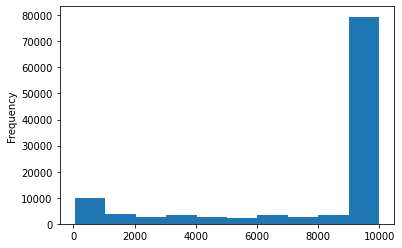

In [ ]:
from locale import normalize
#station.value_counts()
station["visibility_o"].plot.hist();

In [ ]:
#visibility to interval
interval=pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels=['<= 1000 m', '> 1000 m']
station["vis_l"]=pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
station=station.drop(columns=["temp_o"])
station.sample(20)

,visibility_o,vis_l
time,,
2018-03-28 12:00:00,1497.0,> 1000 m
2017-12-18 11:00:00,9994.0,> 1000 m
2013-04-22 02:00:00,9994.0,> 1000 m
2008-10-30 06:00:00,4023.0,> 1000 m
2016-04-09 11:00:00,7001.0,> 1000 m
2015-03-17 05:00:00,7998.0,> 1000 m
2019-05-17 14:00:00,9994.0,> 1000 m
2019-06-06 01:00:00,9994.0,> 1000 m
2017-07-28 12:00:00,9994.0,> 1000 m


**Forecast D1**

In [ ]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD1.csv",parse_dates=["time"]).set_index("time")[50000]
ria_model4k

In [ ]:
#label meteorological model prec points 0 to 9
ria_model4k["visibility0_l"]=pd.cut(ria_model4k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility1_l"]=pd.cut(ria_model4k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility2_l"]=pd.cut(ria_model4k["visibility2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility3_l"]=pd.cut(ria_model4k["visibility3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility4_l"]=pd.cut(ria_model4k["visibility4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility5_l"]=pd.cut(ria_model4k["visibility5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility6_l"]=pd.cut(ria_model4k["visibility6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)



In [ ]:
#concat station model
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["visibility_o"])
df_all4k[["vis_l","visibility0_l","visibility1_l"]].sample(20)

,vis_l,visibility0_l,visibility1_l
time,,,
2013-04-08 20:00:00,> 1000 m,> 1000 m,> 1000 m
2008-08-21 21:00:00,> 1000 m,> 1000 m,> 1000 m
2019-05-22 10:00:00,> 1000 m,> 1000 m,> 1000 m
2009-03-08 04:00:00,> 1000 m,> 1000 m,> 1000 m
2015-02-21 00:00:00,> 1000 m,> 1000 m,> 1000 m
2020-03-18 10:00:00,> 1000 m,> 1000 m,> 1000 m
2013-11-17 23:00:00,> 1000 m,> 1000 m,> 1000 m
2015-04-26 20:00:00,> 1000 m,<= 1000 m,<= 1000 m
2015-01-05 04:00:00,> 1000 m,> 1000 m,> 1000 m


In [ ]:
print("station\n",df_all4k["vis_l"].value_counts(normalize=True))
print("point 0\n",df_all4k["visibility0_l"].value_counts(normalize=True))
print("point 1\n",df_all4k["visibility1_l"].value_counts(normalize=True))
print("point 2\n",df_all4k["visibility2_l"].value_counts(normalize=True))
print("point 3\n",df_all4k["visibility3_l"].value_counts(normalize=True))
print("point 4\n",df_all4k["visibility4_l"].value_counts(normalize=True))
print("point 5\n",df_all4k["visibility5_l"].value_counts(normalize=True))


station
 > 1000 m     0.915146
<= 1000 m    0.084854
Name: vis_l, dtype: float64
point 0
 > 1000 m     0.953792
<= 1000 m    0.046208
Name: visibility0_l, dtype: float64
point 1
 > 1000 m     0.952932
<= 1000 m    0.047068
Name: visibility1_l, dtype: float64
point 2
 > 1000 m     0.943821
<= 1000 m    0.056179
Name: visibility2_l, dtype: float64
point 3
 > 1000 m     0.962733
<= 1000 m    0.037267
Name: visibility3_l, dtype: float64
point 4
 > 1000 m     0.977768
<= 1000 m    0.022232
Name: visibility4_l, dtype: float64
point 5
 > 1000 m     0.967073
<= 1000 m    0.032927
Name: visibility5_l, dtype: float64


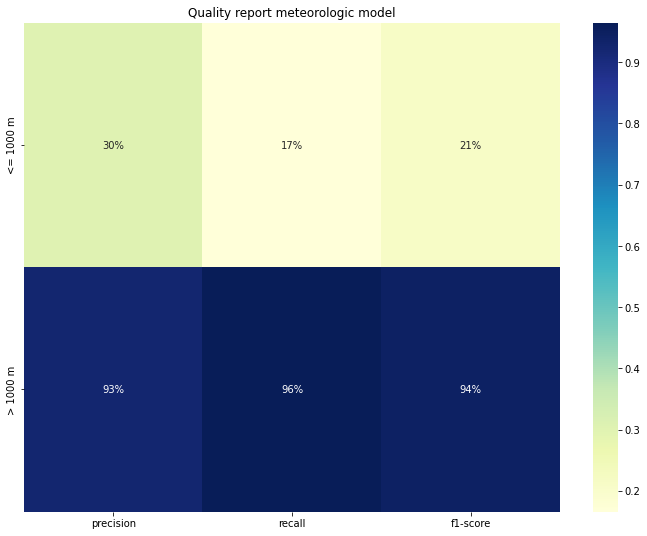

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.vis_l, df_all4k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


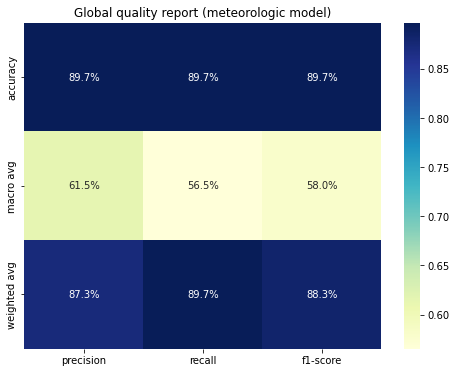

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

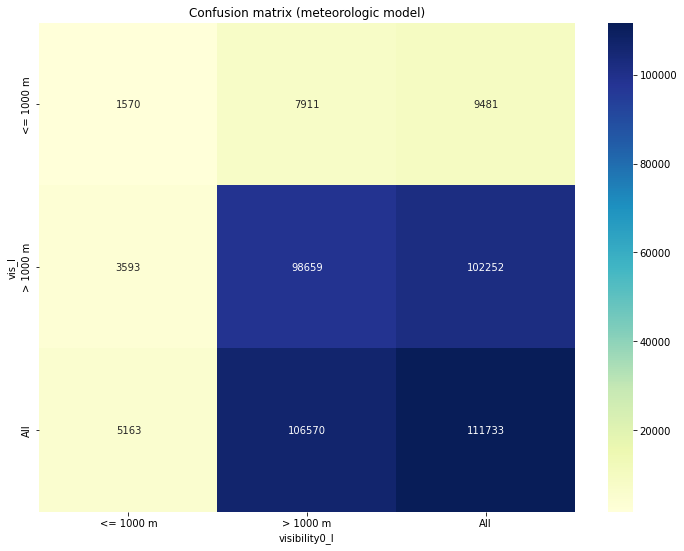

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")
import seaborn as sns
global_sc=pd.crosstab(df_all4k.vis_l, df_all4k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

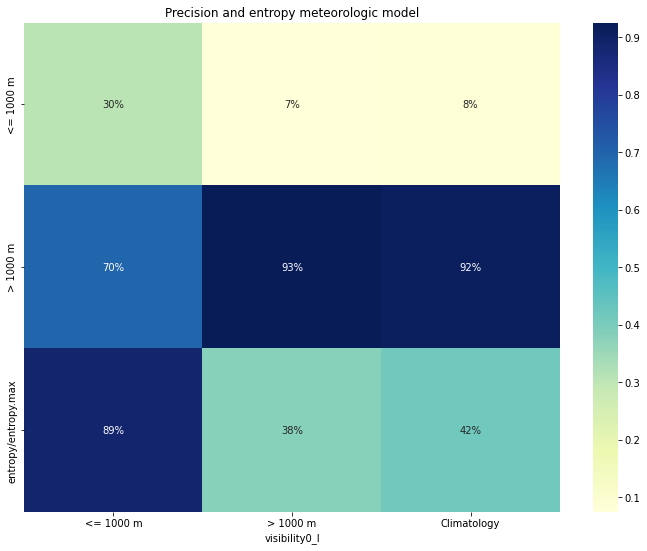

In [ ]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc=pd.crosstab(df_all4k.vis_l, df_all4k.visibility0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Forecast D0**

In [ ]:
#ria forecast d1
ria_model4k=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_st/meteorological_models/lat42.225lon-8.63p10R4KmD0.csv",parse_dates=["time"]).set_index("time")[50000:]
ria_model4k

,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,conv_prec0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2013-12-31 22:00:00,220.593811,4.783985,7.520975,101828.609375,282.434509,0.908351,24051.460938,13.444537,293.503357,0.0,...,9.50,-10.874367,0.000000,0.000000,0.000000,0.000000,5542.688965,1460.608032,253.757309,274.730988
2013-12-31 23:00:00,215.280472,5.123669,7.894343,101847.187500,282.443451,0.894095,24040.841797,17.173229,285.603821,0.0,...,10.52,-5.584305,0.000000,0.047243,0.000000,0.047243,5548.498047,1462.521973,254.071686,275.075256
2014-01-01 01:00:00,182.056458,5.476133,7.194659,101670.117188,282.673187,0.932790,24037.710938,10.476839,294.637726,0.0,...,0.64,-10.058707,0.109409,0.187935,0.000000,0.187935,5539.847168,1447.592041,254.584244,275.692871
2014-01-01 02:00:00,184.922394,6.526751,9.489485,101539.476562,282.661377,0.939031,24038.955078,10.997816,294.232758,0.0,...,0.00,0.000465,0.172660,0.380381,0.000000,0.380381,5532.719238,1435.708984,254.818558,276.185822
2014-01-01 03:00:00,184.399323,7.483301,11.301301,101496.039062,282.977509,0.931014,24036.185547,16.012817,308.529358,0.0,...,2.69,-2.559375,0.204017,0.499366,0.000000,0.499366,5532.133789,1435.126953,255.122757,276.090820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 19:00:00,167.249893,4.803071,10.443219,102130.304688,285.274139,0.883530,24094.119141,30.348995,331.899139,0.0,...,0.00,0.000750,0.600000,0.093750,0.000000,0.600000,5669.991211,1510.901978,258.318634,280.277496
2020-11-11 20:00:00,160.990204,5.888032,12.039003,102151.843750,285.359863,0.873678,22888.912109,40.605156,366.950897,0.0,...,0.00,0.000316,0.500000,0.500000,0.531250,0.531250,5676.644043,1515.951782,258.397308,280.022552
2020-11-11 21:00:00,169.326263,5.852474,11.513367,102204.882812,285.613678,0.870425,22076.751953,43.137783,367.624512,0.0,...,0.00,-0.000039,0.600000,0.500000,0.453125,0.600000,5681.215820,1519.740967,258.154877,280.516174


In [ ]:
#label meteorological model visibility points 0 to 9
ria_model4k["visibility0_l"]=pd.cut(ria_model4k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility1_l"]=pd.cut(ria_model4k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility2_l"]=pd.cut(ria_model4k["visibility2"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility3_l"]=pd.cut(ria_model4k["visibility3"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility4_l"]=pd.cut(ria_model4k["visibility4"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility5_l"]=pd.cut(ria_model4k["visibility5"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
ria_model4k["visibility6_l"]=pd.cut(ria_model4k["visibility6"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)



In [ ]:
#concat station model
df_all4k=pd.concat([station,ria_model4k],axis=1).dropna()
df_all4k=df_all4k.drop(columns=["visibility_o"])
df_all4k[["vis_l","visibility0_l","visibility1_l"]].sample(20)

,vis_l,visibility0_l,visibility1_l
time,,,
2019-11-09 18:00:00,> 1000 m,> 1000 m,> 1000 m
2015-06-08 07:00:00,> 1000 m,> 1000 m,> 1000 m
2015-06-01 02:00:00,<= 1000 m,> 1000 m,<= 1000 m
2016-06-19 12:00:00,> 1000 m,> 1000 m,> 1000 m
2019-03-12 05:00:00,> 1000 m,> 1000 m,> 1000 m
2019-02-14 03:00:00,> 1000 m,> 1000 m,> 1000 m
2020-08-28 18:00:00,> 1000 m,> 1000 m,> 1000 m
2018-12-02 13:00:00,> 1000 m,> 1000 m,> 1000 m
2020-05-20 08:00:00,> 1000 m,> 1000 m,> 1000 m


In [ ]:
print("station\n",df_all4k["vis_l"].value_counts(normalize=True))
print("point 0\n",df_all4k["visibility0_l"].value_counts(normalize=True))
print("point 1\n",df_all4k["visibility1_l"].value_counts(normalize=True))
print("point 2\n",df_all4k["visibility2_l"].value_counts(normalize=True))
print("point 3\n",df_all4k["visibility3_l"].value_counts(normalize=True))
print("point 4\n",df_all4k["visibility4_l"].value_counts(normalize=True))
print("point 5\n",df_all4k["visibility5_l"].value_counts(normalize=True))

station
 > 1000 m     0.90376
<= 1000 m    0.09624
Name: vis_l, dtype: float64
point 0
 > 1000 m     0.956316
<= 1000 m    0.043684
Name: visibility0_l, dtype: float64
point 1
 > 1000 m     0.957342
<= 1000 m    0.042658
Name: visibility1_l, dtype: float64
point 2
 > 1000 m     0.943895
<= 1000 m    0.056105
Name: visibility2_l, dtype: float64
point 3
 > 1000 m     0.962857
<= 1000 m    0.037143
Name: visibility3_l, dtype: float64
point 4
 > 1000 m     0.980394
<= 1000 m    0.019606
Name: visibility4_l, dtype: float64
point 5
 > 1000 m     0.970599
<= 1000 m    0.029401
Name: visibility5_l, dtype: float64


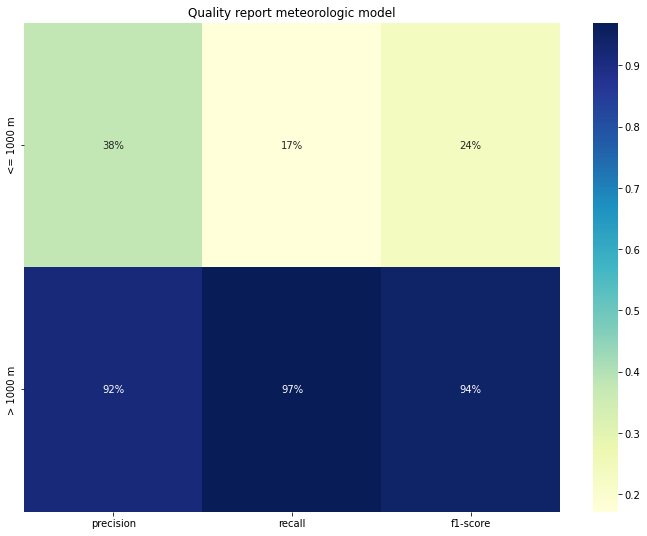

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all4k.vis_l, df_all4k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


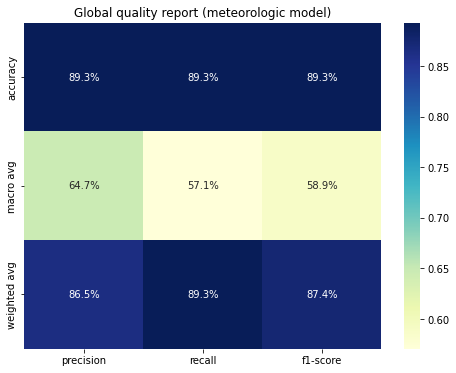

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

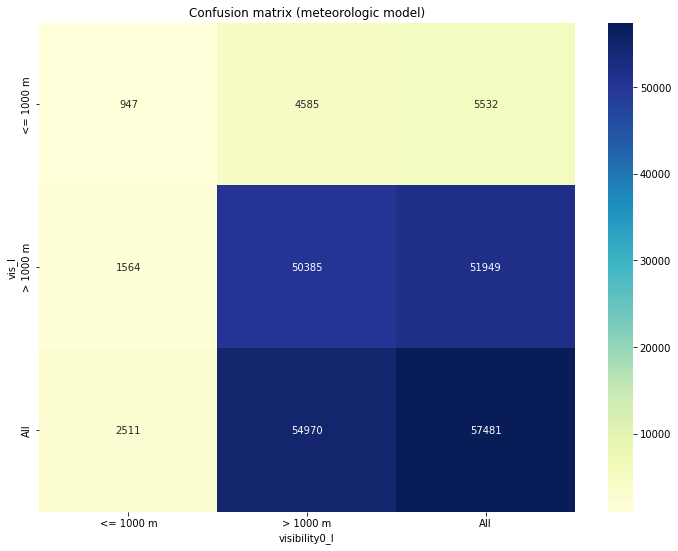

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")
import seaborn as sns
global_sc=pd.crosstab(df_all4k.vis_l, df_all4k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

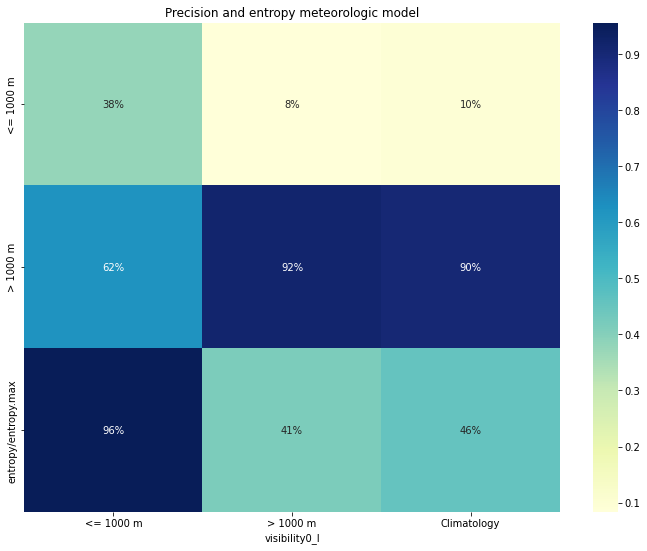

In [ ]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc=pd.crosstab(df_all4k.vis_l, df_all4k.visibility0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**machine learning d0 or d1**

In [ ]:
df_all4k=df_all4k.drop(columns=["visibility0_l","visibility1_l","visibility2_l",
                                    "visibility3_l","visibility4_l","visibility5_l",
                                    "visibility6_l"])
df_all4k

,vis_l,dir0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,lwflx0,...,cape9,cin9,cfh9,cfl9,cfm9,cft9,HGT5009,HGT8509,T5009,T8509
time,,,,,,,,,,,,,,,,,,,,,
2013-12-31 22:00:00,> 1000 m,220.593811,4.783985,7.520975,101828.609375,282.434509,0.908351,24051.460938,13.444537,293.503357,...,9.50,-10.874367,0.000000,0.000000,0.000000,0.000000,5542.688965,1460.608032,253.757309,274.730988
2013-12-31 23:00:00,> 1000 m,215.280472,5.123669,7.894343,101847.187500,282.443451,0.894095,24040.841797,17.173229,285.603821,...,10.52,-5.584305,0.000000,0.047243,0.000000,0.047243,5548.498047,1462.521973,254.071686,275.075256
2014-01-01 01:00:00,> 1000 m,182.056458,5.476133,7.194659,101670.117188,282.673187,0.932790,24037.710938,10.476839,294.637726,...,0.64,-10.058707,0.109409,0.187935,0.000000,0.187935,5539.847168,1447.592041,254.584244,275.692871
2014-01-01 02:00:00,> 1000 m,184.922394,6.526751,9.489485,101539.476562,282.661377,0.939031,24038.955078,10.997816,294.232758,...,0.00,0.000465,0.172660,0.380381,0.000000,0.380381,5532.719238,1435.708984,254.818558,276.185822
2014-01-01 03:00:00,> 1000 m,184.399323,7.483301,11.301301,101496.039062,282.977509,0.931014,24036.185547,16.012817,308.529358,...,2.69,-2.559375,0.204017,0.499366,0.000000,0.499366,5532.133789,1435.126953,255.122757,276.090820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-11 19:00:00,> 1000 m,167.249893,4.803071,10.443219,102130.304688,285.274139,0.883530,24094.119141,30.348995,331.899139,...,0.00,0.000750,0.600000,0.093750,0.000000,0.600000,5669.991211,1510.901978,258.318634,280.277496
2020-11-11 20:00:00,> 1000 m,160.990204,5.888032,12.039003,102151.843750,285.359863,0.873678,22888.912109,40.605156,366.950897,...,0.00,0.000316,0.500000,0.500000,0.531250,0.531250,5676.644043,1515.951782,258.397308,280.022552
2020-11-11 21:00:00,> 1000 m,169.326263,5.852474,11.513367,102204.882812,285.613678,0.870425,22076.751953,43.137783,367.624512,...,0.00,-0.000039,0.600000,0.500000,0.453125,0.600000,5681.215820,1519.740967,258.154877,280.516174


In [ ]:
#insert random
df_all4k['random'] = np.random.random(size = len(df_all4k))

In [ ]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k,
             target = 'vis_l',
             session_id=20,normalize=False ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,feature_selection=True,
             feature_selection_threshold =.15,pca=False,polynomial_features=False,
             trigonometry_features=False,feature_interaction=False)

              

,Description,Value
0,session_id,20
1,Target,vis_l
2,Target Type,Binary
3,Label Encoded,"<= 1000 m: 0, > 1000 m: 1"
4,Original Data,"(57481, 232)"
5,Missing Values,False
6,Numeric Features,231
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models(fold=5,sort="F1")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9196,0.8967,0.9898,0.9263,0.9570,0.3519,0.4065,4.056
rf,Random Forest Classifier,0.9189,0.8896,0.9895,0.9259,0.9566,0.3449,0.3988,12.252
lightgbm,Light Gradient Boosting Machine,0.9163,0.8898,0.9859,0.9262,0.9552,0.3411,0.3841,1.122
gbc,Gradient Boosting Classifier,0.9160,0.8760,0.9880,0.9243,0.9551,0.3215,0.3720,24.792
ada,Ada Boost Classifier,0.9079,0.8627,0.9835,0.9200,0.9507,0.2546,0.2953,5.062
ridge,Ridge Classifier,0.9052,0.0000,0.9987,0.9060,0.9501,0.0464,0.1263,0.080
lr,Logistic Regression,0.9050,0.8157,0.9903,0.9121,0.9496,0.1479,0.2053,5.376
dummy,Dummy Classifier,0.9037,0.5000,1.0000,0.9037,0.9494,0.0000,0.0000,0.066
knn,K Neighbors Classifier,0.8977,0.7625,0.9700,0.9211,0.9449,0.2438,0.2609,13.438
lda,Linear Discriminant Analysis,0.8954,0.8281,0.9547,0.9313,0.9428,0.3284,0.3320,0.220


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20, verbose=0,
                     warm_start=False)

In [ ]:
model=create_model("lightgbm",n_estimators=200,fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9176,0.8942,0.9859,0.9275,0.9558,0.3571,0.3987
1,0.9201,0.9000,0.9854,0.9303,0.9571,0.3900,0.4273
2,0.9203,0.8997,0.9830,0.9325,0.9571,0.4078,0.4378
3,0.9189,0.9001,0.9835,0.9306,0.9563,0.3874,0.4202
4,0.9154,0.8950,0.9832,0.9276,0.9545,0.3515,0.3864
Mean,0.9185,0.8978,0.9842,0.9297,0.9562,0.3788,0.4141
Std,0.0018,0.0026,0.0012,0.0019,0.0009,0.0212,0.0189


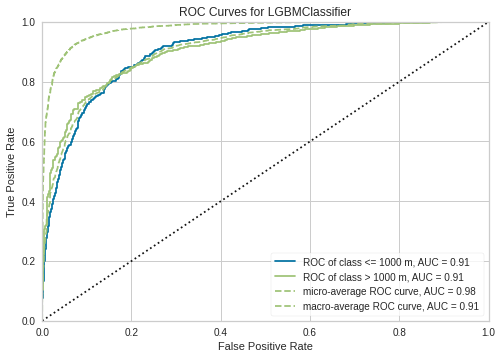

In [ ]:
plot_model(model, plot = 'auc')

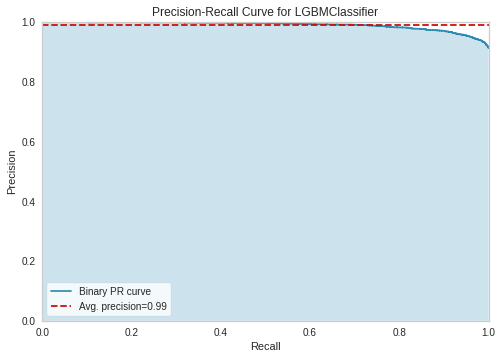

In [ ]:
plot_model(model, plot = 'pr')

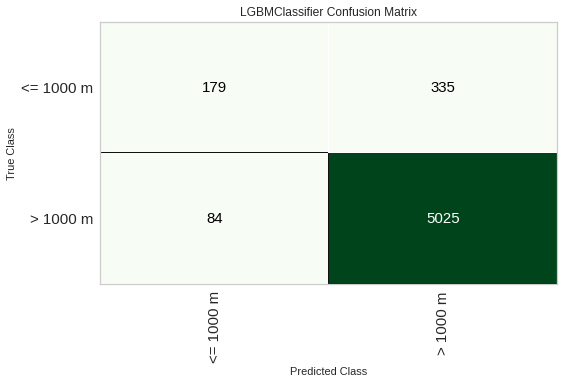

In [ ]:
plot_model(model,'confusion_matrix')

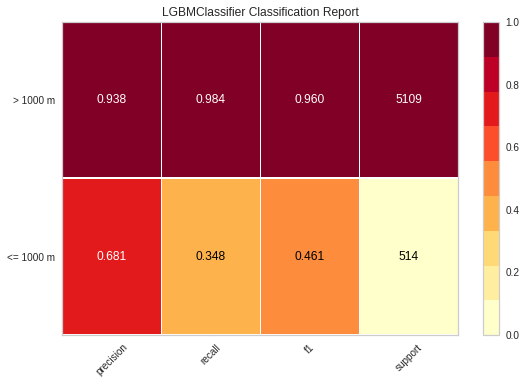

In [ ]:
plot_model(model,'class_report')

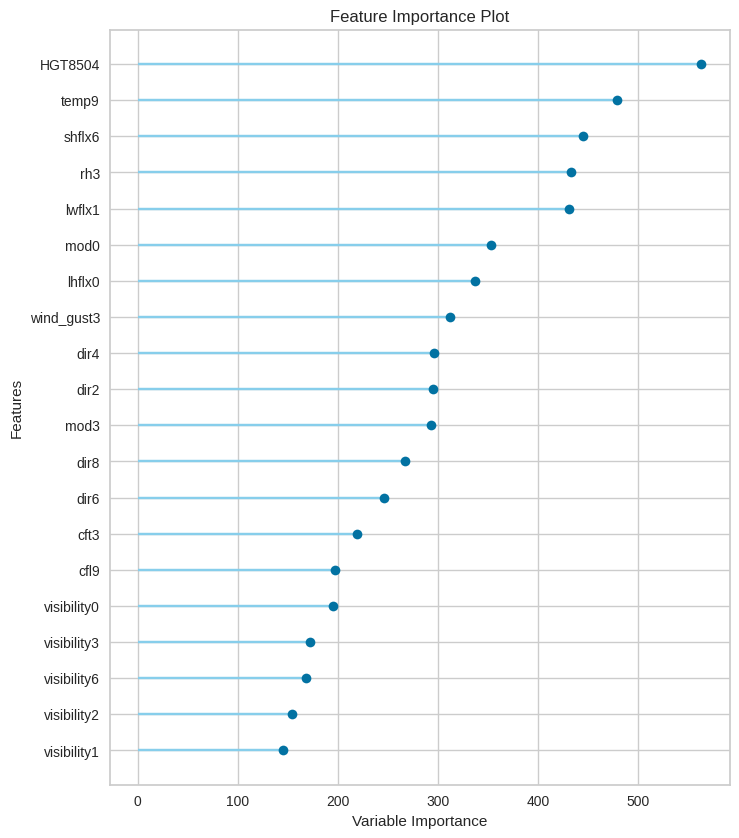

In [ ]:
plot_model(model,"feature_all")

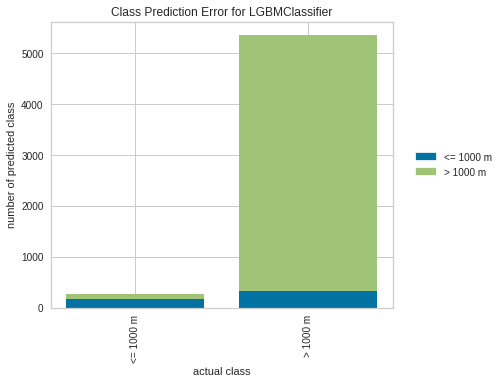

In [ ]:
plot_model(model,"error")

**Export model**

In [ ]:
x_var=get_config("X_train").columns
x_var

Index(['visibility0', 'visibility1', 'visibility4', 'lwflx2', 'visibility9',
       'mod0', 'dir2', 'dir9', 'cin7', 'rh3', 'wind_gust9', 'shflx7', 'dir8',
       'cft3', 'cin8', 'lhflx8', 'cfl9', 'visibility3', 'temp3', 'dir4',
       'cfl4', 'lwflx4', 'dir6', 'visibility2'],
      dtype='object')

In [ ]:
#define x and y
Y=df_all4k.vis_l
X=df_all4k[x_var]

In [ ]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
#ml_model=ExtraTreesClassifier(n_estimators=150).fit(X_train,y_train)
ml_model=LGBMClassifier(n_estimators=250).fit(X_train,y_train)


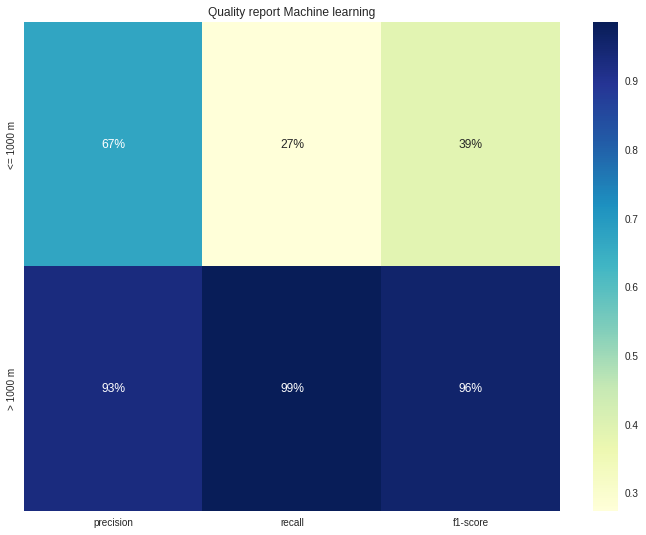

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report Machine learning")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


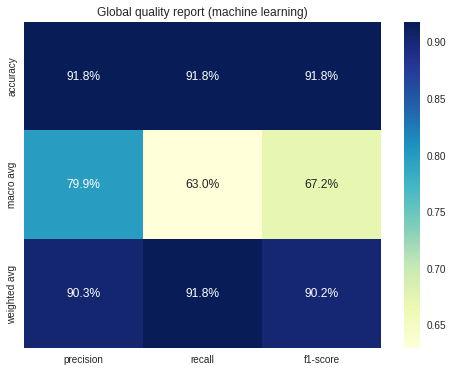

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (machine learning)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

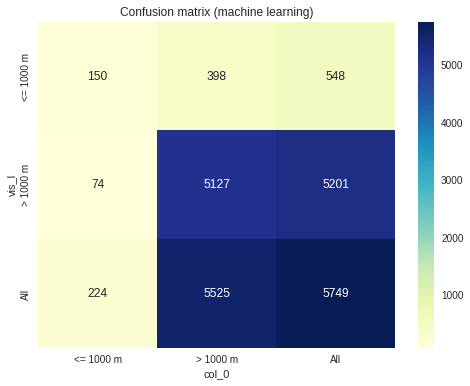

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Confusion matrix (machine learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

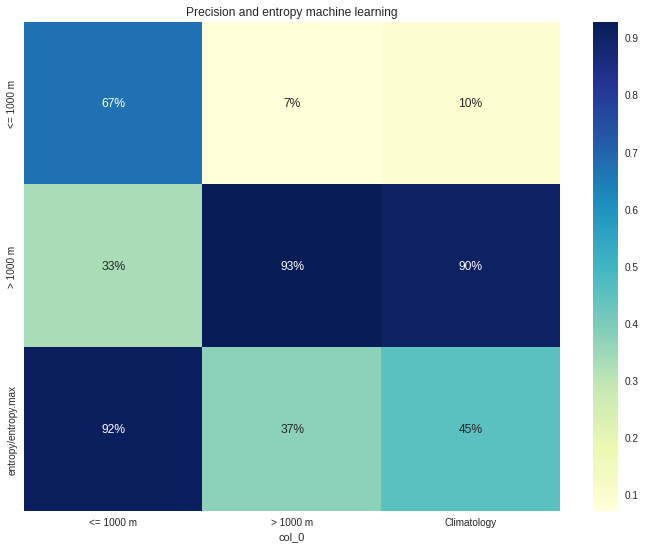

In [ ]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy machine learning")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [ ]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("vis_LEVX_d0.al", 'wb'))

**Improve algorithm**

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


215/215 [==============================] - 2s 6ms/step - loss: 0.2854 - accuracy: 0.9120 - val_loss: 0.2546 - val_accuracy: 0.9132
Epoch 2/100
215/215 [==============================] - 1s 5ms/step - loss: 0.2475 - accuracy: 0.9152 - val_loss: 0.2445 - val_accuracy: 0.9144
Epoch 3/100
215/215 [==============================] - 1s 6ms/step - loss: 0.2392 - accuracy: 0.9159 - val_loss: 0.2383 - val_accuracy: 0.9146
Epoch 4/100
215/215 [==============================] - 1s 6ms/step - loss: 0.2337 - accuracy: 0.9166 - val_loss: 0.2337 - val_accuracy: 0.9158
Epoch 5/100
215/215 [==============================] - 1s 5ms/step - loss: 0.2295 - accuracy: 0.9177 - val_loss: 0.2304 - val_accuracy: 0.9171
Epoch 6/100
215/215 [==============================] - 1s 5ms/step - loss: 0.2261 - accuracy: 0.9183 - val_loss: 0.2273 - val_accuracy: 0.9173
Epoch 7/100
215/215 [==============================] - 1s 5ms/step - loss: 0.2234 - accuracy: 0.9188 - val_loss: 0.2249 - val_accuracy: 0.9178
Epoch 8/100

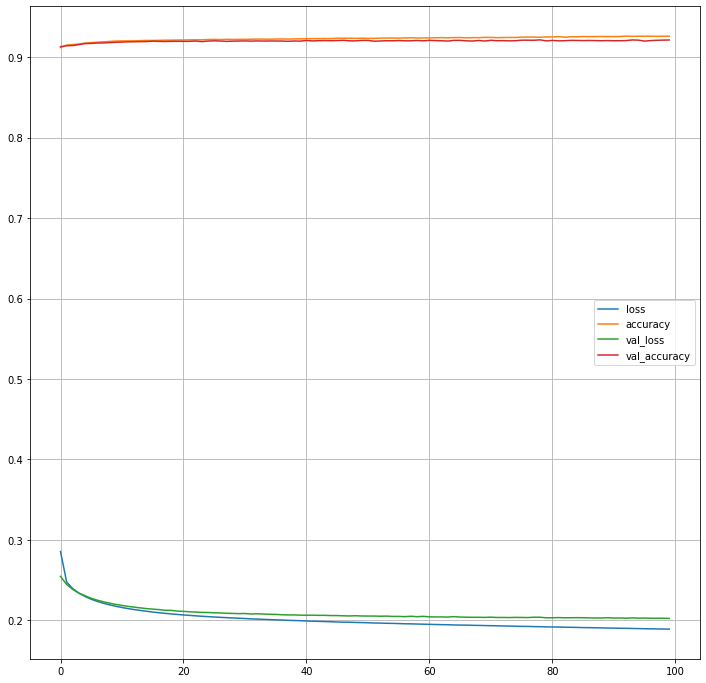

In [ ]:
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model, load_model, Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, AlphaDropout
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

#define x and y
Y=df_all4k.vis_l
x_var = ['cfl1', 'visibility9', 'cfl9', 'dir6', 'cfl3', 'dir8', 'visibility4',
       'visibility8', 'visibility6', 'rh3', 'wind_gust4', 'visibility2',
       'cfl7', 'dir4', 'lwflx6', 'cfl8', 'visibility0', 'cfl6', 'cfl5', 'cfl2',
       'cfl4', 'wind_gust9', 'cfl0', 'swflx7', 'dir9', 'dir7', 'lhflx3',
       'mod3', 'temp9', 'visibility3', 'visibility1']

#all x variables      
X=df_all4k[df_all4k.columns[1:-7]]

#selected variables
#X=df_all4k[x_var]

 
scaler = StandardScaler()
learn_rate = 0.001 #@param ["0.001", "0.01", "0.0001"] {type:"raw", allow-input: true}
batch_size =  400#@param ["48", "96", "124"] {type:"raw", allow-input: true}
epochs =  100#@param ["10", "100", "1000"] {type:"raw", allow-input: true}


#transform bins_label to label binary array
labels=[ '> 1000 m','<= 1000 m',]
lb = preprocessing.LabelBinarizer()
lb.fit(labels)
Y=lb.transform(Y)


#independent variables. 
X_sc=scaler.fit_transform(X)


#we  scale and split
x_train, x_test, y_train, y_test = train_test_split(X_sc,Y, test_size=0.2,random_state=42)


#neural network
mlp = Sequential()
mlp.add(Input(shape=(x_train.shape[1], )))
mlp.add(Dense(150, activation='relu'))
#mlp.add(Dropout(0.5))
mlp.add(Dense(25, activation='relu'))
#mlp.add(Dropout(0.5))
mlp.add(Dense(1, activation='sigmoid'))
mlp.compile(optimizer=tf.keras.optimizers.SGD(lr=learn_rate, momentum=0.9),
              loss='binary_crossentropy',
              metrics=['accuracy',])
             

history = mlp.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=1).history

pd.DataFrame(history).plot(grid=True,figsize=(12,12),)
  

mlp.summary()
y_pred=mlp.predict(x_test)

#transform bynary array to label scale 

y_pred=lb.inverse_transform(y_pred)
y_test=lb.inverse_transform(y_test)




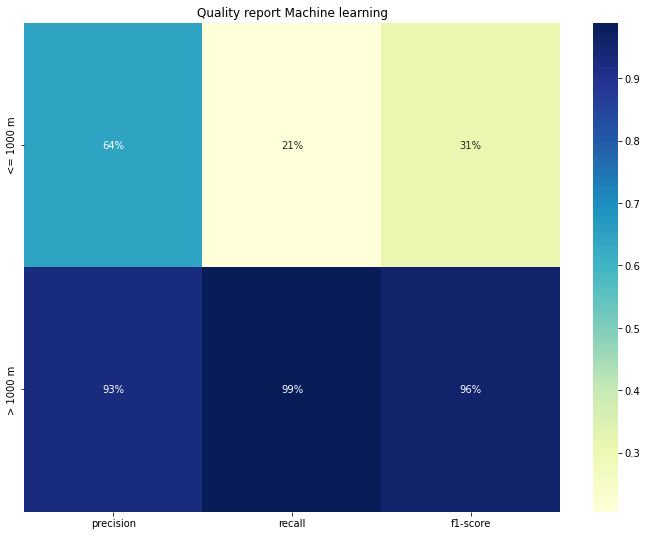

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, y_pred,output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report Machine learning")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');

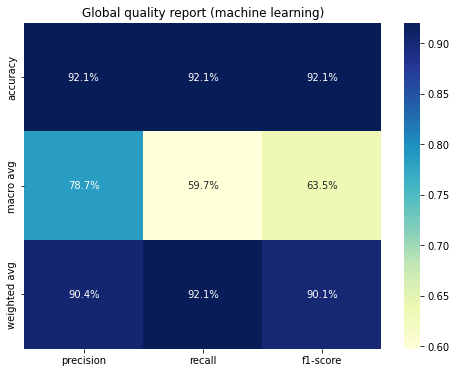

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (machine learning)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

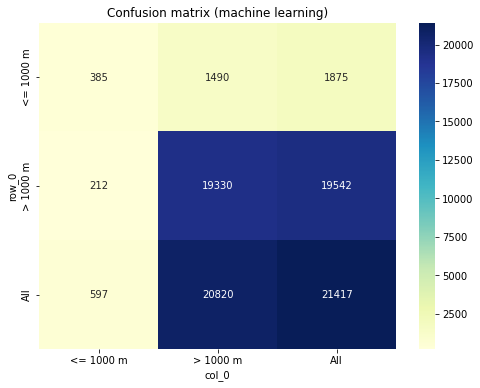

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Confusion matrix (machine learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, y_pred,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

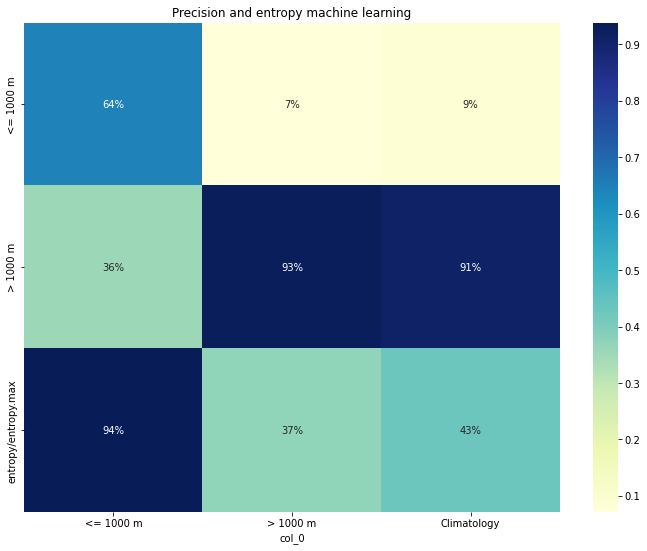

In [ ]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy machine learning")
column_sc=pd.crosstab(y_test, y_pred, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**Improving with pycaret**

In [ ]:
df_all4k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37481 entries, 2016-05-23 21:00:00 to 2020-11-11 23:00:00
Columns: 232 entries, vis_l to random
dtypes: float64(231), object(1)
memory usage: 66.6+ MB


In [ ]:
#change start time
df_all4k=df_all4k[10000:]
df_all4k.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 37481 entries, 2016-05-23 21:00:00 to 2020-11-11 23:00:00
Columns: 232 entries, vis_l to random
dtypes: float64(231), object(1)
memory usage: 66.6+ MB


In [ ]:
from pycaret.classification import *
#drop variables model labeled
clas = setup(df_all4k,
             target = 'vis_l',
             session_id=20, normalize=True ,train_size=.85,remove_multicollinearity=True,
             fix_imbalance=False,ignore_low_variance=True,
             feature_selection=True,feature_selection_threshold =.15,pca=False,
             polynomial_features=False,trigonometry_features=False,feature_interaction=False)


,Description,Value
0,session_id,20
1,Target,vis_l
2,Target Type,Binary
3,Label Encoded,"<= 1000 m: 0, > 1000 m: 1"
4,Original Data,"(37481, 232)"
5,Missing Values,False
6,Numeric Features,231
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9201,0.8950,0.9911,0.9258,0.9573,0.3463,0.4064,6.118
rf,Random Forest Classifier,0.9195,0.8895,0.9906,0.9256,0.9570,0.3424,0.4008,22.012
lightgbm,Light Gradient Boosting Machine,0.9176,0.8931,0.9862,0.9273,0.9558,0.3533,0.3961,1.722
gbc,Gradient Boosting Classifier,0.9170,0.8803,0.9874,0.9257,0.9556,0.3365,0.3843,46.576
lr,Logistic Regression,0.9108,0.8558,0.9901,0.9177,0.9525,0.2310,0.2933,0.935
ada,Ada Boost Classifier,0.9081,0.8670,0.9819,0.9216,0.9508,0.2703,0.3067,9.034
ridge,Ridge Classifier,0.9056,0.0000,0.9986,0.9065,0.9503,0.0514,0.1334,0.068
dummy,Dummy Classifier,0.9039,0.5000,1.0000,0.9039,0.9495,0.0000,0.0000,0.032
knn,K Neighbors Classifier,0.9036,0.8011,0.9702,0.9265,0.9479,0.3074,0.3232,35.664
svm,SVM - Linear Kernel,0.9024,0.0000,0.9922,0.9084,0.9484,0.0716,0.0953,0.432


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20, verbose=0,
                     warm_start=False)

In [ ]:
create_model("et",fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9217,0.8999,0.9900,0.9283,0.9582,0.3555,0.4093
1,0.9228,0.9018,0.9902,0.9293,0.9587,0.3695,0.4224
2,0.9217,0.9055,0.9888,0.9293,0.9581,0.3661,0.4146
3,0.9233,0.8933,0.9912,0.9289,0.9590,0.3662,0.4236
4,0.9208,0.8934,0.9906,0.9270,0.9578,0.3402,0.3975
Mean,0.9221,0.8988,0.9902,0.9286,0.9584,0.3595,0.4135
Std,0.0009,0.0048,0.0008,0.0008,0.0005,0.0107,0.0095


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=20, verbose=0,
                     warm_start=False)

In [ ]:
x_var=get_config("X_train").columns
x_var

Index(['visibility0', 'temp9', 'wind_gust3', 'dir2', 'mod0', 'visibility6',
       'rh3', 'dir8', 'cft3', 'shflx6', 'cfl9', 'visibility3', 'dir4', 'dir6',
       'mod3', 'visibility2', 'HGT8504', 'lwflx1', 'visibility1', 'lhflx0'],
      dtype='object')

In [ ]:
#define x and y
Y=df_all4k.vis_l
X=df_all4k[x_var]

In [ ]:
#Run the machine learning model
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, random_state=1)
ml_model=ExtraTreesClassifier(n_estimators=200).fit(X_train,y_train)
#ml_model=LGBMClassifier(n_estimators=150).fit(X_train,y_train)


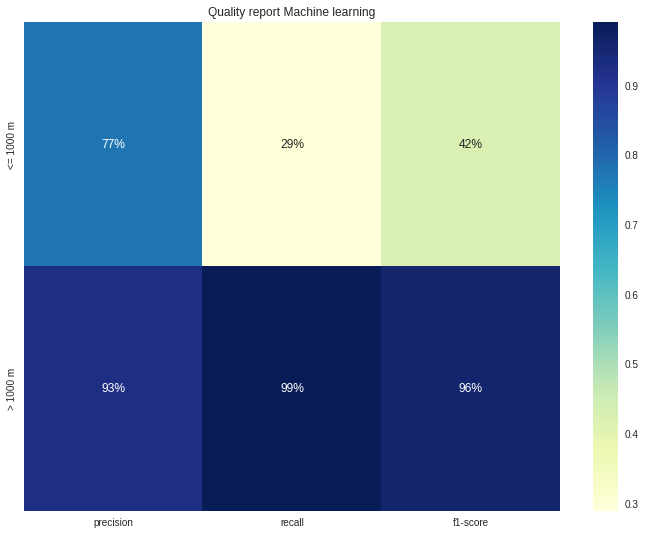

In [ ]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
cr=pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T
plt.figure(figsize=(12, 9))
plt.title("Quality report Machine learning")
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


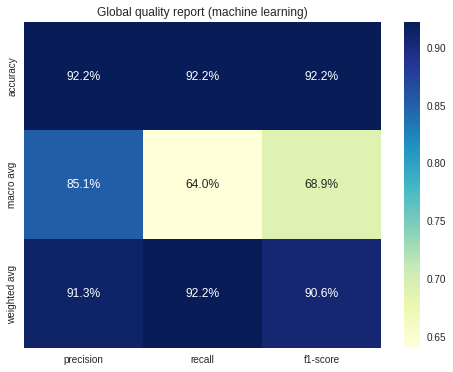

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (machine learning)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

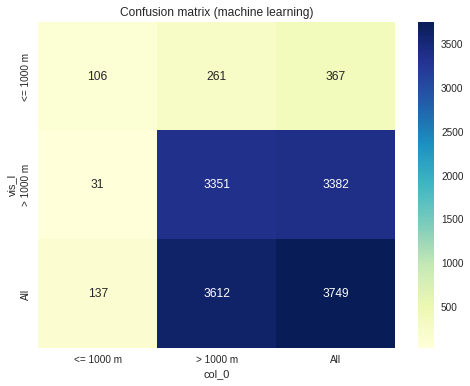

In [ ]:
plt.figure(figsize=(8, 6))
plt.title("Confusion matrix (machine learning)")
import seaborn as sns
global_sc=pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

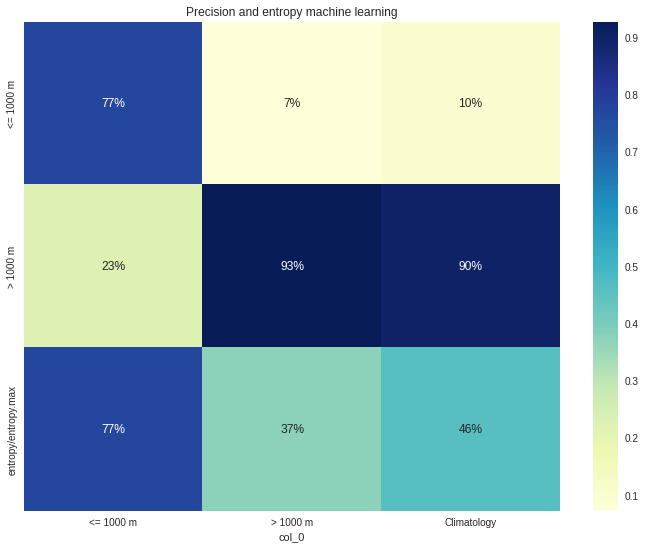

In [ ]:
import math
from scipy.stats import entropy
plt.figure(figsize=(12, 9))
plt.title("Precision and entropy machine learning")
column_sc=pd.crosstab(y_test, ml_model.predict(X_test), margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

**export improved algorithm to weight**

In [ ]:
import pickle
model_dict={"x_var":x_var,"ml_model":ml_model,"coor":coor}
pickle.dump(model_dict, open("vis_LEVX_d0.al", 'wb'))